<a href="https://colab.research.google.com/github/hanna3549/testtest/blob/master/cnn_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 합성곱 신경망

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    TensorFlow.org에서 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    깃허브(GitHub) 소스 보기</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

이 튜토리얼은 MNIST 숫자를 분류하기 위해 간단한 [합성곱 신경망](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network)(Convolutional Neural Network, CNN)을 훈련합니다. 간단한 이 네트워크는 MNIST 테스트 세트에서 99% 정확도를 달성할 것입니다. 이 튜토리얼은 [케라스 Sequential API](https://www.tensorflow.org/guide/keras)를 사용하기 때문에 몇 줄의 코드만으로 모델을 만들고 훈련할 수 있습니다.

노트: GPU를 사용하여 CNN의 훈련 속도를 높일 수 있습니다. 코랩에서 이 노트북을 실행한다면 * 수정 -> 노트 설정 -> 하드웨어 가속기* 에서 GPU를 선택하세요.

### 텐서플로 임포트하기

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc1

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

### MNIST 데이터셋 다운로드하고 준비하기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


matplotilb을 임포트 하여 데이터가 실제 갖는 이미지를 시각화하기

In [ ]:
import matplotlib.pyplot as plt

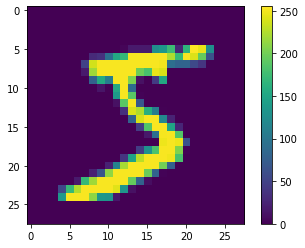

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

데이터 전처리

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

### 합성곱 층 만들기

아래 6줄의 코드에서 [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)와 [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) 층을 쌓는 일반적인 패턴으로 합성곱 층을 정의합니다.

CNN은 배치(batch) 크기를 제외하고 (이미지 높이, 이미지 너비, 컬러 채널) 크기의 텐서(tensor)를 입력으로 받습니다. MNIST 데이터는 (흑백 이미지이기 때문에) 컬러 채널(channel)이 하나지만 컬러 이미지는 (R,G,B) 세 개의 채널을 가집니다. 이 예에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하는 CNN을 정의하겠습니다. 이 값을 첫 번째 층의 `input_shape` 매개변수로 전달합니다.

In [ ]:
# Conv2D와 MaxPooling2D 층의 출력은 (높이, 너비, 채널) 크기의 3D 텐서
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

지금까지 모델의 구조를 출력해 보죠.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


위에서 Conv2D와 MaxPooling2D 층의 출력은 (높이, 너비, 채널) 크기의 3D 텐서입니다. 높이와 너비 차원은 네트워크가 깊어질수록 감소하는 경향을 가집니다. Conv2D 층에서 출력 채널의 수는 첫 번째 매개변수에 의해 결정됩니다(예를 들면, 32 또는 64). 일반적으로 높이와 너비가 줄어듦에 따라 (계산 비용 측면에서) Conv2D 층의 출력 채널을 늘릴 수 있습니다.

### 마지막에 Dense 층 추가하기

모델을 완성하려면 마지막 합성곱 층의 출력 텐서(크기 (4, 4, 64))를 하나 이상의 Dense 층에 주입하여 분류를 수행합니다. Dense 층은 벡터(1D)를 입력으로 받는데 현재 출력은 3D 텐서입니다. 먼저 3D 출력을 1D로 펼치겠습니다. 그다음 하나 이상의 Dense 층을 그 위에 추가하겠습니다. MNIST 데이터는 10개의 클래스가 있으므로 마지막에 Dense 층에 10개의 출력과 소프트맥스 활성화 함수를 사용합니다.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

최종 모델의 구조를 확인해 보죠.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

여기에서 볼 수 있듯이 두 개의 Dense 층을 통과하기 전에 (4, 4, 64) 출력을 (1024) 크기의 벡터로 펼쳤습니다.

### 모델 컴파일과 훈련하기

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1430 - accuracy: 0.9540
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0462 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0251 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0199 - accuracy: 0.9937


### 모델 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.0460 - accuracy: 0.9853


In [ ]:
print(test_acc)

0.9853000044822693


결과에서 보듯이 간단한 CNN 모델이 99%의 테스트 정확도를 달성합니다. 몇 라인의 코드치고 나쁘지 않네요! (케라스의 서브클래싱 API와 GradientTape를 사용하여) CNN을 만드는 또 다른 방법은 [여기](https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/quickstart/advanced.ipynb)를 참고하세요.